#  Saving Model Training Progress

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np
# Load libraries
from keras import models
from keras import layers


Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn

In [2]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000


In [4]:
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)
np.load = np_load_old
# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")


/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# Start neural network
network = models.Sequential()
# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [6]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [7]:
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=20, # Number of epochs
callbacks=checkpoint, # Checkpoint                      
verbose=1, # Print description after each epoch
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 63us/step - loss: 0.6378 - acc: 0.6242 - val_loss: 0.5140 - val_acc: 0.8228
Epoch 2/20
25000/25000 [==============================] - 1s 46us/step - loss: 0.5094 - acc: 0.7737 - val_loss: 0.3945 - val_acc: 0.8462
Epoch 3/20
25000/25000 [==============================] - 1s 41us/step - loss: 0.4604 - acc: 0.8038 - val_loss: 0.3631 - val_acc: 0.8549
Epoch 4/20
25000/25000 [==============================] - 2s 63us/step - loss: 0.4324 - acc: 0.8185 - val_loss: 0.3454 - val_acc: 0.8584
Epoch 5/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.4238 - acc: 0.8222 - val_loss: 0.3384 - val_acc: 0.8599
Epoch 6/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.4114 - acc: 0.8298 - val_loss: 0.3370 - val_acc: 0.8608
Epoch 7/20
25000/25000 [==============================] - 1s 53us/step - loss: 0.4022 - acc: 0.8349 - val_loss: 0.3363 - val_acc

# Visualizing Neural Networks

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

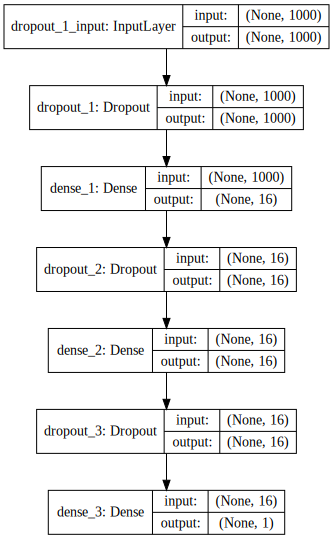

In [9]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))